## Observations and Insights 

In [ ]:
#1: Overall from the selected treatments Capomulin and Ramicane reduces the size of tumors and is more sucessful.
#2: The results of the study are very consistent, thus reliable, as there is only 1 outlier in the data set for the top drugs, and none for Capomulin
#3: The heavier the mouse, the less effective the drug is (see scatter plot). This is a reliable conclusion because of the strong r-value correlation (0.95) resulting from the linear regression.
#4: There is a correlation of 0.84 between the tumor volume and the weight of the mice. This means we should be careful when looking at tumor volume because of the weight of the mice will affect it.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [85]:
# Checking the number of mice.
mice=merge_table["Mouse ID"].count()
mice

1893

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=merge_table.loc[merge_table.duplicated(['Mouse ID', 'Timepoint',])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dmouse_id=merge_table[merge_table.duplicated(['Mouse ID'])]
all_dmouse_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= merge_table.drop_duplicates('Mouse ID')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [35]:
# Checking the number of mice in the clean DataFrame.
clean_mice= clean_df["Mouse ID"].count()
clean_mice

249

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summary_df
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_regimen = merge_table.groupby('Drug Regimen')
agg_drug_regimen_df = agg_drug_regimen.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_drug_regimen_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

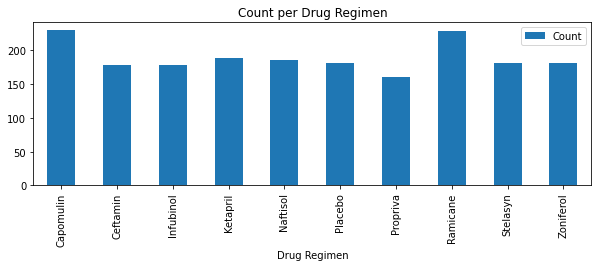

<Figure size 432x288 with 0 Axes>

In [42]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using PANDAS.
grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()
# Filter the DataFrame down only to those columns to chart
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

#Creating bar chart
regimen_datapoints.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()


Text(0, 0.5, 'Count')

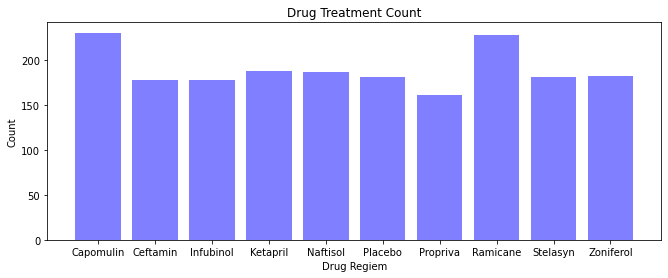

In [47]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using PYPLOT.
drug_list = summary_df.index.tolist()
drug_list
#Create list
drug_count = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

x_axis = np.arange(len(drug_count))
x_axis = drug_list

#Creating bar chart
plt.figure(figsize=(11,4))
plt.bar(x_axis, drug_count, color='b', alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regiem")
plt.ylabel("Count")


Text(0, 0.5, '')

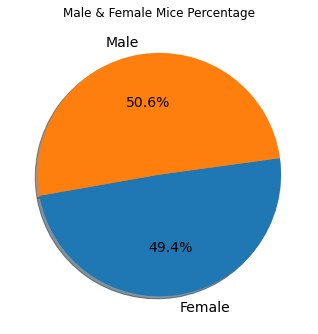

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()

#Alter the dataframe down to two columns
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df.head()

#Creating pie chart
plt.figure(figsize=(12,6))
ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df["Sex"], legend = False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

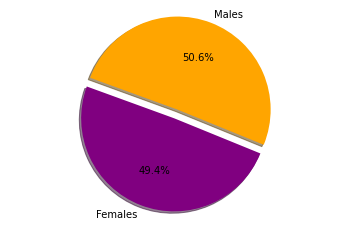

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (merge_table.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

#Adding details to the pie chart
labels = ["Females", "Males"]
colors = ["purple", "orange"]
explode = (0.1, 0)

#Creating the pie chart
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin_data = merge_table.loc[merge_table['Drug Regimen'] == 'Capomulin',:]
ramicane_data = merge_table.loc[merge_table['Drug Regimen'] == 'Ramicane',:]
infubinol_data = merge_table.loc[merge_table['Drug Regimen'] == 'Infubinol',:]
ceftamin_data = merge_table.loc[merge_table['Drug Regimen'] == 'Ceftamin',:]

In [75]:
capomulin_groupby = capomulin_data.groupby('Mouse ID').max()['Timepoint']
capomulin_df = pd.DataFrame(capomulin_groupby)
capomulin_data_merge = pd.merge(capomulin_df, merge_table, on=("Mouse ID",'Timepoint'), how='left')

capomulin_tumor = capomulin_data_merge['Tumor Volume (mm3)']
capomulin_quartiles = capomulin_tumor.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
print(f"Potential tumor volume outliers for mouse tested with the Capomulin regimen are values below {capomulin_lower_bound} and above {capomulin_upper_bound}.")

Potential tumor volume outliers for mouse tested with the Capomulin regimen are values below 20.70456164999999 and above 51.83201549.


In [77]:
ramicane_groupby = ramicane_data.groupby('Mouse ID').max()['Timepoint']
ramicane_df = pd.DataFrame(ramicane_groupby)
ramicane_data_merge = pd.merge(ramicane_df, merge_table, on=("Mouse ID",'Timepoint'), how='left')

ramicane_tumor = ramicane_data_merge['Tumor Volume (mm3)']
ramicane_quartiles = ramicane_tumor.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
print(f"Potential tumor volume outliers for mouse tested with the Ramicane regimen are values below {ramicane_lower_bound} and above {ramicane_upper_bound}.")

Potential tumor volume outliers for mouse tested with the Ramicane regimen are values below 17.912664470000003 and above 54.30681135.


In [78]:
infubinol_groupby = infubinol_data.groupby('Mouse ID').max()['Timepoint']
infubinol_df = pd.DataFrame(infubinol_groupby)
infubinol_data_merge = pd.merge(infubinol_df, merge_table, on=("Mouse ID",'Timepoint'), how='left')

infubinol_tumor = infubinol_data_merge['Tumor Volume (mm3)']
infubinol_quartiles = infubinol_tumor.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
print(f"Potential tumor volume outliers for mouse tested with the Infubinol regimen are values below {infubinol_lower_bound} and above {infubinol_upper_bound}.")

Potential tumor volume outliers for mouse tested with the Infubinol regimen are values below 36.83290494999999 and above 82.74144559000001.


In [79]:
ceftamin_groupby = ceftamin_data.groupby('Mouse ID').max()['Timepoint']
ceftamin_df = pd.DataFrame(ceftamin_groupby)
ceftamin_data_merge = pd.merge(ceftamin_df, merge_table, on=("Mouse ID",'Timepoint'), how='left')

ceftamin_tumor = ceftamin_data_merge['Tumor Volume (mm3)']
ceftamin_quartiles = ceftamin_tumor.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
print(f"Potential tumor volume outliers for mouse tested with the Ceftamin regimen are values below {ceftamin_lower_bound} and above {ceftamin_upper_bound}.")

Potential tumor volume outliers for mouse tested with the Ceftamin regimen are values below 25.355449580000002 and above 87.66645829999999.


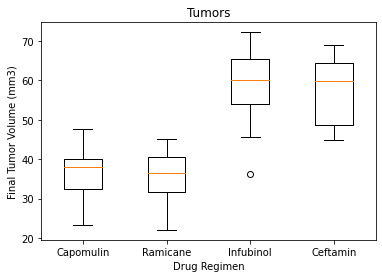

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_box_plot = [capomulin_tumor, ramicane_tumor, infubinol_tumor, ceftamin_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumor_box_plot, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

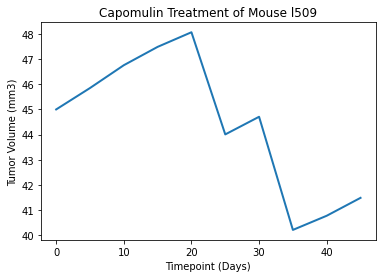

In [81]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_l509 = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509",:]

x_axis_l509 = mouse_l509['Timepoint']
tumor_vol_l509 = mouse_l509['Tumor Volume (mm3)']

plt.title('Capomulin Treatment of Mouse l509')
plt.plot(x_axis_l509, tumor_vol_l509, linewidth=2, markersize=10)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (Days)')
plt.show()

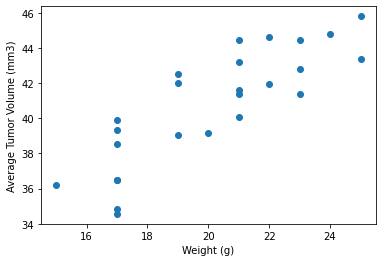

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

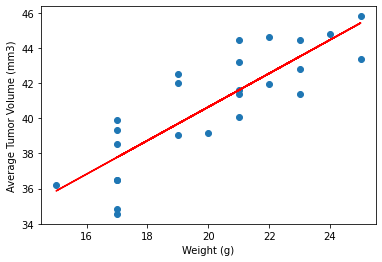

In [83]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_corr = round(st.pearsonr(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])

regress_values = avg_tumor_vol['Weight (g)'] * slope + intercept
plt.scatter(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])
plt.plot(avg_tumor_vol['Weight (g)'], regress_values, color='red')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()